In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [66]:
f = r.TFile("./data/gm2offline_full_22207241_27191.00177.root")
#f = r.TFile("./data/gm2nearline_hists_run24750_00258.root")
f.cd("clusterTree")
f.ls()

TFile**		./data/gm2offline_full_22207241_27191.00177.root	
 TFile*		./data/gm2offline_full_22207241_27191.00177.root	
  TDirectoryFile*		clusterTree	clusterTree (ClusterTree) folder
   KEY: TTree	clusters;1	clusters
  KEY: TDirectoryFile	nearlineHistTree;1	nearlineHistTree (CaloNearlineHistograms) folder
  KEY: TDirectoryFile	clusterTree;1	clusterTree (ClusterTree) folder
  KEY: TDirectoryFile	t0Analyzer;1	t0Analyzer (T0PulseProcessorAnalyzer) folder
  KEY: TDirectoryFile	ibmsAnalyzer;1	ibmsAnalyzer (IBMSAnalyzer) folder
  KEY: TDirectoryFile	CoincidenceFinderLM;1	CoincidenceFinderLM (CoincidenceFinderLM) folder
  KEY: TDirectoryFile	FastRotation;1	FastRotation


In [67]:
nt = f.Get("nearlineHistTree").Get("eventTree")
ct = f.Get("clusterTree").Get("clusters")
ct.SetLineColor(2)
mt = f.Get("CoincidenceFinderLM").Get("CoincLM")
mt.SetLineColor(6)

In [72]:
mt.Print()

******************************************************************************
*Tree    :CoincLM   : CoincLM                                                *
*Entries :   484077 : Total =        74145701 bytes  File  Size =   21309845 *
*        :          : Tree compression factor =   3.48                       *
******************************************************************************
*Br    0 :coincidenceLevel : coincidenceLevel/i                              *
*Entries :   484077 : Total  Size=    1943367 bytes  File Size  =      18546 *
*Baskets :       61 : Basket Size=      32000 bytes  Compression= 104.69     *
*............................................................................*
*Br    1 :caloNum   : vector<int>                                            *
*Entries :   484077 : Total  Size=    8773558 bytes  File Size  =     876152 *
*Baskets :      335 : Basket Size=      32000 bytes  Compression=  10.01     *
*...................................................

In [69]:
h = r.TH1D("h","nearlineHistTree",700,0,700)

h2 = h.Clone("h2")
h2.SetTitle("clusterTree")
h2.SetLineColor(2)

h3 = h.Clone("h3")
h3.SetTitle("coincidence finder")
h3.SetLineColor(6)

109078 109078 109078


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


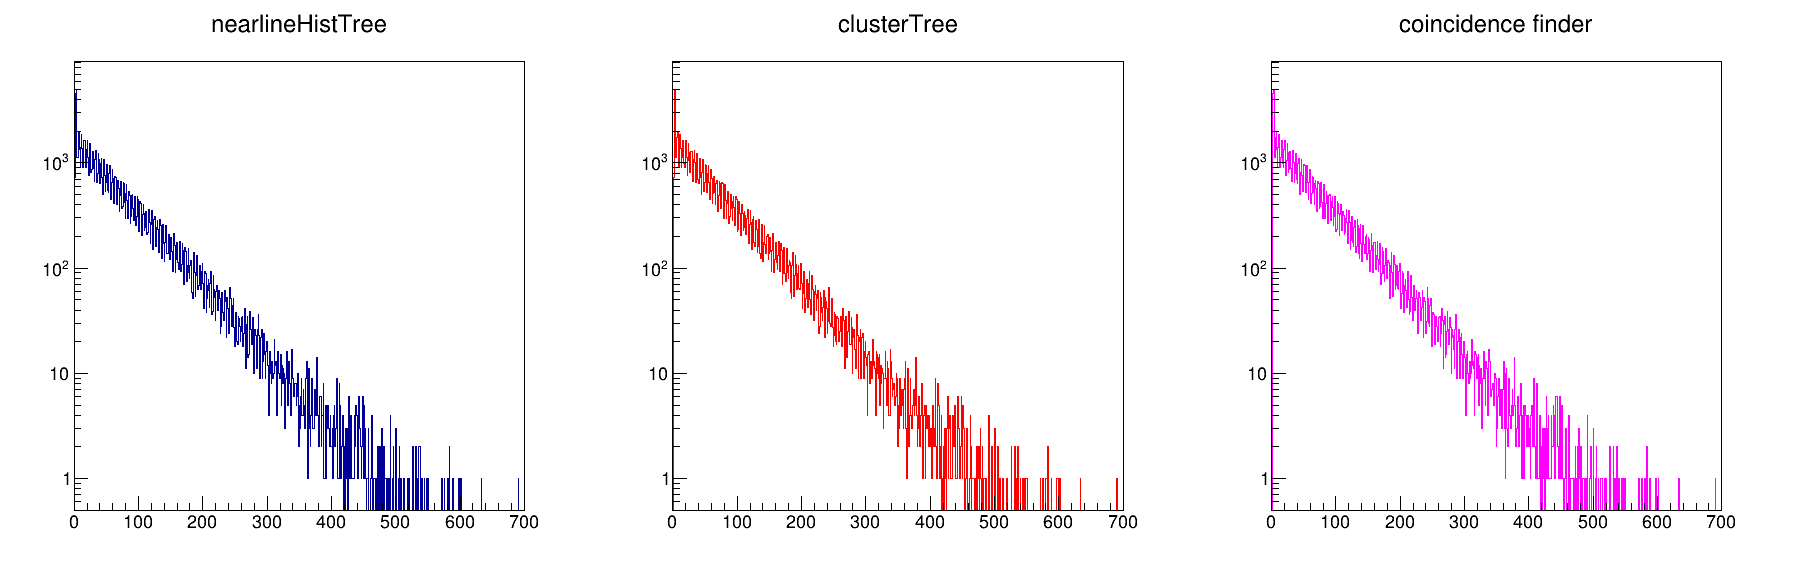

In [75]:
c = r.TCanvas("c","c",1800,600)
c.Divide(3)
c.cd(1)
n1 = nt.Draw("time*1.25/1000>>h","energy > 1800 && energy < 10000","goff")
r.gPad.SetLogy()
h.Draw()

c.cd(2)
n2 = ct.Draw("time*1.25/1000>>h2","energy > 1800 && energy < 10000","goff")
r.gPad.SetLogy()
h2.Draw()

c.cd(3)
n3 = mt.Draw("clusterTime*1.25/1000>>h3","coincidenceLevel == 1 && clusterEnergy > 1800 && clusterEnergy < 10000","goff")
r.gPad.SetLogy()
h3.Draw()
c.Draw()

print(n1, n2, n3)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


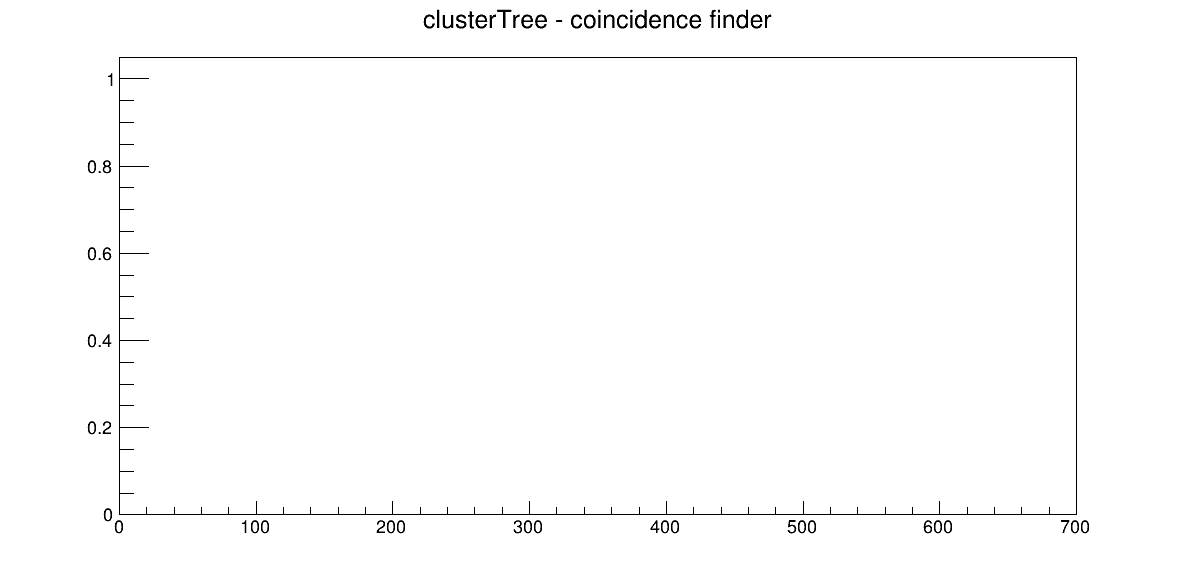

In [76]:
hdiff = h2.Clone("hdiff")
hdiff.SetTitle("clusterTree - coincidence finder")
hdiff.Add(h3,-1)
c = r.TCanvas("c","c",1200,600)
hdiff.Draw()
c.Draw()